<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Mission-2" data-toc-modified-id="Mission-2-0.1">Mission 2</a></span><ul class="toc-item"><li><span><a href="#1.-Analyse-de-l'éboulis-des-valeurs-propres" data-toc-modified-id="1.-Analyse-de-l'éboulis-des-valeurs-propres-0.1.1">1. Analyse de l'éboulis des valeurs propres</a></span></li><li><span><a href="#2.-Représentation-des-variables-par-le-cercle-des-corrélations" data-toc-modified-id="2.-Représentation-des-variables-par-le-cercle-des-corrélations-0.1.2">2. Représentation des variables par le cercle des corrélations</a></span></li><li><span><a href="#3.-Représentation-des-individus-par-les-plans-factoriels" data-toc-modified-id="3.-Représentation-des-individus-par-les-plans-factoriels-0.1.3">3. Représentation des individus par les plans factoriels</a></span></li><li><span><a href="#4.-Analyser-de-la-qualité-de-représentation-et-la-contribution-des-individus" data-toc-modified-id="4.-Analyser-de-la-qualité-de-représentation-et-la-contribution-des-individus-0.1.4">4. Analyser de la qualité de représentation et la contribution des individus</a></span></li></ul></li><li><span><a href="#Mission-3-:-Appliquez-un-algorithme-de-classification" data-toc-modified-id="Mission-3-:-Appliquez-un-algorithme-de-classification-0.2">Mission 3 : Appliquez un algorithme de classification</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Choisir-2-Clusters" data-toc-modified-id="Choisir-2-Clusters-0.2.0.1">Choisir 2 Clusters</a></span></li><li><span><a href="#Choisir-3-Clusters" data-toc-modified-id="Choisir-3-Clusters-0.2.0.2">Choisir 3 Clusters</a></span></li></ul></li><li><span><a href="#3.-Représentation-des-individus-par-les-plans-factoriels" data-toc-modified-id="3.-Représentation-des-individus-par-les-plans-factoriels-0.2.1">3. Représentation des individus par les plans factoriels</a></span></li></ul></li><li><span><a href="#Mission-3-:-Régression-logistique" data-toc-modified-id="Mission-3-:-Régression-logistique-0.3">Mission 3 : Régression logistique</a></span></li></ul></li><li><span><a href="#Choix-des-variables-selon-corrélation" data-toc-modified-id="Choix-des-variables-selon-corrélation-1">Choix des variables selon corrélation</a></span></li></ul></div>

In [1]:
import functions as f

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import decomposition, preprocessing
from sklearn.cluster import KMeans

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [58]:
df_notes = pd.read_csv('data\\notes.csv')

In [7]:
df_notes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [59]:
df_notes_acp = df_notes.iloc[:,1:].copy()
data = df_notes.iloc[:,1:].copy()
X = df_notes_acp.values
names = df_notes_acp.index
features = df_notes_acp.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [60]:
data_scaled = pd.DataFrame(data=X_scaled, columns=features)

## Mission 2

### 1. Analyse de l'éboulis des valeurs propres

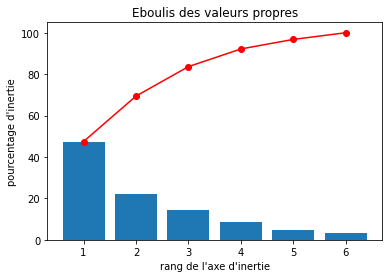

In [9]:
# choix du nombre de composantes à calculer
n_comp = 6

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp).fit(X_scaled)

# Eboulis des valeurs propres
f.display_scree_plot(pca)

### 2. Représentation des variables par le cercle des corrélations

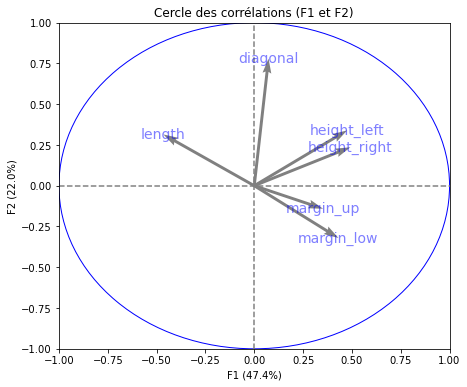

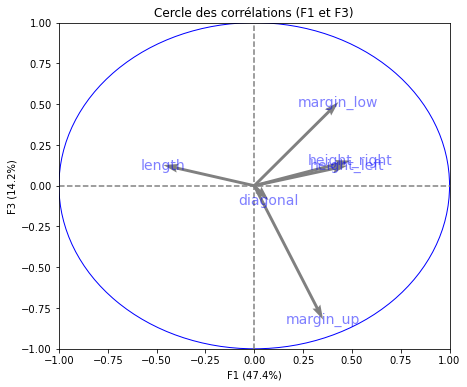

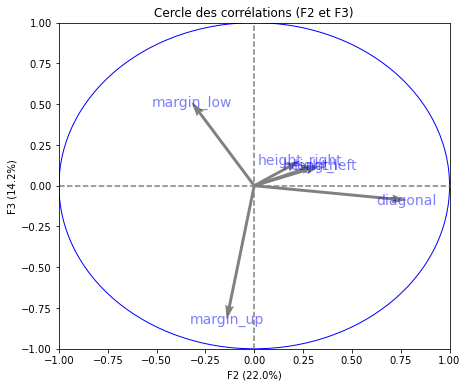

In [10]:
pcs = pca.components_
f.display_circles(pcs, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(features))

### 3. Représentation des individus par les plans factoriels

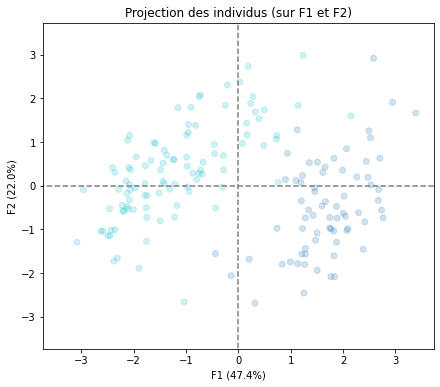

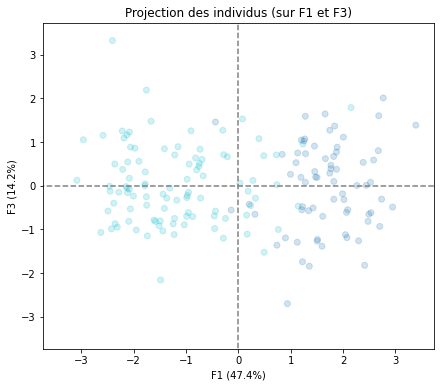

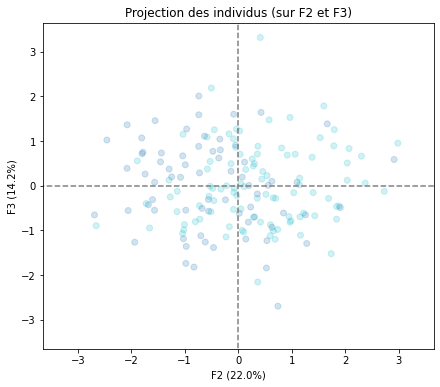

In [11]:
X_projected = pca.transform(X_scaled)
f.display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], c=df_notes['is_genuine'], alpha = 0.2)

plt.show()

### 4. Analyser de la qualité de représentation et la contribution des individus

## Mission 3 : Appliquez un algorithme de classification

In [12]:
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

C:\Users\am_bo\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertie')

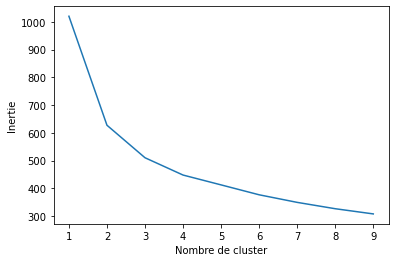

In [13]:
inertia = []
k_range= range(1,10)
for k in k_range :
    model = KMeans(n_clusters = k).fit(X_scaled)
    inertia.append(model.inertia_)
plt.plot(k_range, inertia)
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie')

#### Choisir 2 Clusters

In [14]:
# Récuprer les individus attribués à chaque cluster
model = KMeans(n_clusters = 2).fit(X_scaled)
clusters = model.labels_
# Centre de chaque cluster
centroide = model.cluster_centers_

In [15]:
# Comparaison des clusters trouvés avec les classification des billets
comparaison_cluster = pd.DataFrame({"Classe": df_notes['is_genuine'], "Cluster_Kmeans": clusters})
comparaison_cluster.pivot_table(index="Classe", columns="Cluster_Kmeans", aggfunc=len, fill_value=0)

Cluster_Kmeans,0,1
Classe,,
False,69,1
True,7,93


#### Choisir 3 Clusters

In [16]:
# Récuprer les individus attribués à chaque cluster
model = KMeans(n_clusters = 3).fit(X_scaled)
clusters = model.labels_
# Centre de chaque cluster
centroide = model.cluster_centers_

In [17]:
# Comparaison des clusters trouvés avec les classification des billets
comparaison_cluster = pd.DataFrame({"Classe": df_notes['is_genuine'], "Cluster_Kmeans": clusters})
comparaison_cluster.pivot_table(index="Classe", columns="Cluster_Kmeans", aggfunc=len, fill_value=0)

Cluster_Kmeans,0,1,2
Classe,,,
False,3,66,1
True,30,1,69


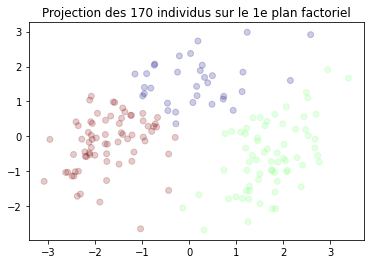

In [18]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))

plt.show(block=False)

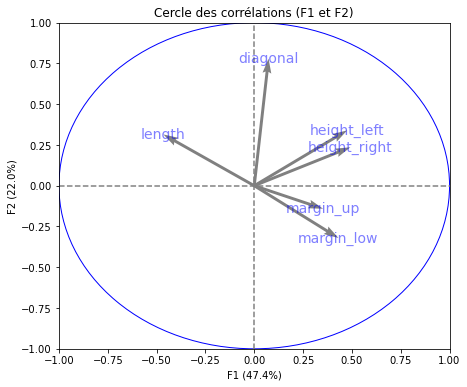

In [19]:
pcs = pca.components_
f.display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

### 3. Représentation des individus par les plans factoriels

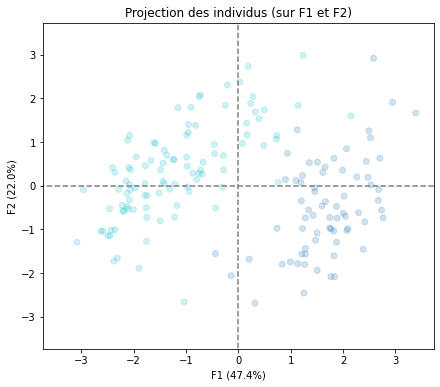

In [20]:
X_projected = pca.transform(X_scaled)
f.display_factorial_planes(X_projected, n_comp, pca, [(0,1)], c=df_notes['is_genuine'], alpha = 0.2)

plt.show()

## Mission 3 : Régression logistique

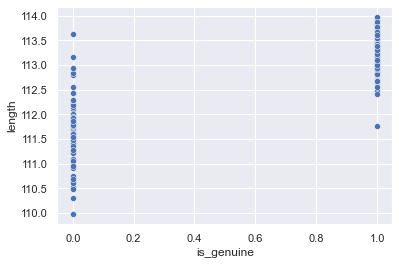

In [22]:
sns.set()

ax = sns.scatterplot(x="is_genuine", y="length", data=df_notes)

In [23]:
print(sm.__version__)

0.13.2


In [24]:
df_notes.columns


Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [25]:
# reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
# print(reg_log2.summary())

In [26]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

PerfectSeparationError: Perfect separation detected, results not available

sans : height_right

In [41]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+margin_low+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

PerfectSeparationError: Perfect separation detected, results not available

sans : height_left

In [41]:
reg_log2 = smf.glm('is_genuine~diagonal+height_right+margin_low+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

PerfectSeparationError: Perfect separation detected, results not available

sans : height_right et margin_low

In [91]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      165
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -23.580
Date:                                       Mon, 21 Mar 2022   Deviance:                       47.161
Time:                                               09:52:11   Pearson chi2:                     103.
No. Iterations:                                            8   Pseudo R-squ. (CS):             0.6596
Covariance Type:                                   nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     492.4547    236.074      2.086      0.037      29.758     955.151
diagonal       -3.3285      1.389     -2.396      0.017      -6.052      -0.605
height_left     4.5636      1.764      2.587      0.010       1.106       8.021
margin_up       6.0814      2.504      2.429      0.015       1.174      10.988
length         -3.6926      0.778     -4.746      0.000      -5.217      -2.168
===============================================================================
"""

In [77]:
x = df_notes.iloc[:,1:].drop(columns = 'height_right')

In [81]:
x.corr().style.background_gradient(cmap='bwr').format(precision=3)

,diagonal,height_left,margin_low,margin_up,length
diagonal,1.000,0.320,-0.181,-0.027,0.080
height_left,0.320,1.000,0.425,0.325,-0.421
margin_low,-0.181,0.425,1.000,0.171,-0.637
margin_up,-0.027,0.325,0.171,1.000,-0.525
length,0.080,-0.421,-0.637,-0.525,1.000


sans : height_right

In [8]:
x = df_notes.iloc[:,1:].drop(columns = ['length','height_right'])

In [18]:
x = df_notes['diagonal']

In [20]:
# on ajoute une colonne pour la constante
x_stat = sm.add_constant(x)
y = df_notes['is_genuine']

In [21]:
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.667660
         Iterations 5


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                 0.01452
Time:                        12:13:38   Log-Likelihood:                -113.50
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                   0.06747
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -163.6338     91.322     -1.792      0.073    -342.622      15.355
diagonal       0.9538      0.531      1.796      0.073      -0.087       1.995
==============================================================================
"""

In [23]:
result.aic

231.00453880092522

In [98]:
result.bic


37.4721867188361

In [33]:
print('*'*10,'b')

********** b


In [37]:
from time import time

In [38]:
data = df_notes.iloc[:,1:]
y = df_notes['is_genuine']
for i in (data.columns):
    
    x= data[i]
    # on ajoute une colonne pour la constante
    x_stat = sm.add_constant(x)
    # on ajuste le modèle
    time_begin = time()
    model = sm.Logit(y, x_stat)    
    result = model.fit()
    time_end=time()
    print('*'*10,' ',i,' ','*'*10)
    print(result.summary())
    print('Time = ',time_end-time_begin)


Optimization terminated successfully.
         Current function value: 0.667660
         Iterations 5
**********   diagonal   **********
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                 0.01452
Time:                        12:32:20   Log-Likelihood:                -113.50
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                   0.06747
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -163.6338     91.322     -1.792      0.073    -342.622      1

In [31]:
# for i in range (1:len(df_notes.columns

In [40]:
model.bic

AttributeError: 'Logit' object has no attribute 'bic'

In [93]:
reg_log2 = smf.glm('is_genuine~diagonal',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      168
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -113.50
Date:                                       Mon, 21 Mar 2022   Deviance:                       227.00
Time:                                               09:54:01   Pearson chi2:                     170.
No. Iterations:                                            4   Pseudo R-squ. (CS):            0.01948
Covariance Type:                                   nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    163.6338     91.322      1.792      0.073     -15.354     342.622
diagonal      -0.9538      0.531     -1.796      0.073      -1.995       0.087
==============================================================================
"""

In [94]:
reg_log2 = smf.glm('is_genuine~length',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      168
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -31.836
Date:                                       Mon, 21 Mar 2022   Deviance:                       63.672
Time:                                               09:54:34   Pearson chi2:                     371.
No. Iterations:                                            7   Pseudo R-squ. (CS):             0.6249
Covariance Type:                                   nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    549.0766     87.271      6.292      0.000     378.028     720.125
length        -4.8811      0.775     -6.298      0.000      -6.400      -3.362
==============================================================================
"""

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#to create the confusion matrix
from sklearn import metrics

In [31]:
#valeurs caractéristiques et valeur cible
x = df_notes[['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']]
y = df_notes['is_genuine']
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

100.0


In [35]:
y_predict = modele_regLog.predict(x_test)

In [36]:
y_predict

array([False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True,  True, False,  True])

In [37]:
y_test

133    False
136    False
168    False
54      True
56      True
144    False
7       True
96      True
121    False
97      True
141    False
5       True
83      True
109    False
55      True
18      True
61      True
101    False
60      True
63      True
153    False
4       True
106    False
161    False
108    False
37      True
66      True
157    False
45      True
26      True
33      True
125    False
44      True
8       True
119    False
92      True
98      True
152    False
155    False
24      True
30      True
113    False
51      True
Name: is_genuine, dtype: bool

In [40]:
#confusion matrix
c1 = metrics.confusion_matrix(y_test, y_predict)
print(c1)

[[18  0]
 [ 0 25]]


# Choix des variables selon corrélation 

In [62]:
data = df_notes.drop(columns=['diagonal','length','height_right','margin_low'])

In [63]:
data.columns

Index(['is_genuine', 'height_left', 'margin_up'], dtype='object')

In [77]:
reg_log2 = smf.glm('is_genuine~height_left+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      167
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -67.695
Date:                                       Mon, 21 Mar 2022   Deviance:                       135.39
Time:                                               16:33:32   Pearson chi2:                     160.
No. Iterations:                                            6                                         
Covariance Type:                                   nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -396.2547     86.891     -4.560      0.000    -566.558    -225.951
height_left     3.5593      0.825      4.313      0.000       1.942       5.177
margin_up       7.9264      1.386      5.718      0.000       5.210      10.643
===============================================================================
"""

In [66]:
reg_log2.aic

141.3896222110202

In [78]:
reg_log2 = smf.glm('is_genuine~length',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      168
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -31.836
Date:                                       Mon, 21 Mar 2022   Deviance:                       63.672
Time:                                               16:33:49   Pearson chi2:                     371.
No. Iterations:                                            7                                         
Covariance Type:                                   nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    549.0766     87.271      6.292      0.000     378.028     720.125
length        -4.8811      0.775     -6.298      0.000      -6.400      -3.362
==============================================================================
"""

In [68]:
reg_log2.aic

67.671955195131

In [69]:
reg_log2 = smf.glm('is_genuine~length+height_left+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      166
Model Family:                                       Binomial   Df Model:                            3
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -26.812
Date:                                       Mon, 21 Mar 2022   Deviance:                       53.624
Time:                                               16:27:03   Pearson chi2:                     141.
No. Iterations:                                            7                                         
Covariance Type:                                   nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     141.4152    165.722      0.853      0.393    -183.394     466.225
length         -3.8337      0.750     -5.109      0.000      -5.304      -2.363
height_left     2.6205      1.345      1.948      0.051      -0.016       5.257
margin_up       5.2310      2.345      2.231      0.026       0.636       9.826
===============================================================================
"""

In [76]:
reg_log2.aic

61.62420689377881

In [75]:
reg_log2 = smf.glm('is_genuine~length+height_left+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      166
Model Family:                                       Binomial   Df Model:                            3
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -26.812
Date:                                       Mon, 21 Mar 2022   Deviance:                       53.624
Time:                                               16:30:46   Pearson chi2:                     141.
No. Iterations:                                            7                                         
Covariance Type:                                   nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     141.4152    165.722      0.853      0.393    -183.394     466.225
length         -3.8337      0.750     -5.109      0.000      -5.304      -2.363
height_left     2.6205      1.345      1.948      0.051      -0.016       5.257
margin_up       5.2310      2.345      2.231      0.026       0.636       9.826
===============================================================================
"""

In [ ]:
height_right

In [8]:
x = df_notes.iloc[:,1:].drop(columns = ['length','height_right'])

In [102]:
x = df_notes[['margin_up','length','margin_low']]

In [103]:

# on ajoute une colonne pour la constante
x_stat = sm.add_constant(x)
y = df_notes['is_genuine']

In [104]:
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\am_bo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                   1.000
Time:                        16:58:59   Log-Likelihood:            -5.3323e-07
converged:                      False   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.163e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1374.7668    3.8e+07  -3.62e-05      1.000   -7.45e+07    7.45e+07
margin_up   -674.4122   2.19e+07  -3.08e-05      1.000   -4.29e+07    4.29e+07
length        45.0275   7.03e+05   6.41e-05      1.000   -1.38e+06    1.38e+06
margin_low  -332.9090   1.02e+07  -3.26e-05      1.000      -2e+07       2e+07
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [115]:
result.aic

8.000001066459946

In [ ]:
61.62420689377896


In [111]:
df_test = pd.read_csv('example.csv')

In [112]:
x_test = df_test[['margin_up','length','margin_low']]

In [121]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                   1.000
Time:                        17:35:35   Log-Likelihood:            -5.3323e-07
converged:                      False   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.163e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1374.7668    3.8e+07  -3.62e-05      1.000   -7.45e+07    7.45e+07
margin_up   -674.4122   2.19e+07  -3.08e-05      1.000   -4.29e+07    4.29e+07
length        45.0275   7.03e+05   6.41e-05      1.000   -1.38e+06    1.38e+06
margin_low  -332.9090   1.02e+07  -3.26e-05      1.000      -2e+07       2e+07
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [119]:
result.predict(df_test[['margin_up','length','margin_low']])

ValueError: shapes (5,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [126]:
reg_log2 = smf.glm('is_genuine~length+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      167
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -28.906
Date:                                       Mon, 21 Mar 2022   Deviance:                       57.812
Time:                                               17:38:20   Pearson chi2:                     178.
No. Iterations:                                            7                                         
Covariance Type:                                   nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    445.5575     86.940      5.125      0.000     275.159     615.956
length        -4.1095      0.760     -5.407      0.000      -5.599      -2.620
margin_up      5.2005      2.299      2.263      0.024       0.695       9.706
==============================================================================
"""

In [127]:
x_test = df_test[['length','margin_up']]

In [128]:
reg_log2.predict(x_test)

0    0.992187
1    0.894990
2    0.990948
3    0.020334
4    0.023361
dtype: float64

In [130]:

    print(i)

0.9921866739590428
0.8949895761403803
0.9909483199210417
0.020334459397484825
0.02336093957934454


In [131]:
for i in reg_log2.predict(x_test):
    if (i>=0.5):
        print('1')
    else :
        print('0')

1
1
1
0
0


In [ ]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [ ]:
reg_log2 = smf.glm('is_genuine~height_right',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [ ]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [ ]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+margin_low+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [ ]:
reg_log2 = smf.glm('is_genuine~diagonal+margin_low+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [ ]:
reg_log2 = smf.glm('is_genuine~margin_low+margin_up',data=df_notes, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

In [46]:
from math import sqrt, log


In [43]:
df_notes.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [50]:
df_notes['s_margin_low'] = df_notes["margin_low"].map(lambda x: log(x))

In [ ]:

# #Import the function
# from sklearn.preprocessing import StandardScaler

# #Say we have a train dataset called Data_train
# Scaler = StandardScaler.fit(Data_train)
# Data_train_scaled = Scaler.transform(Data_train)

# #And we want to apply this transformation to a new dataset called New_data
# New_data_scaled = Scaler.transform(New_data)


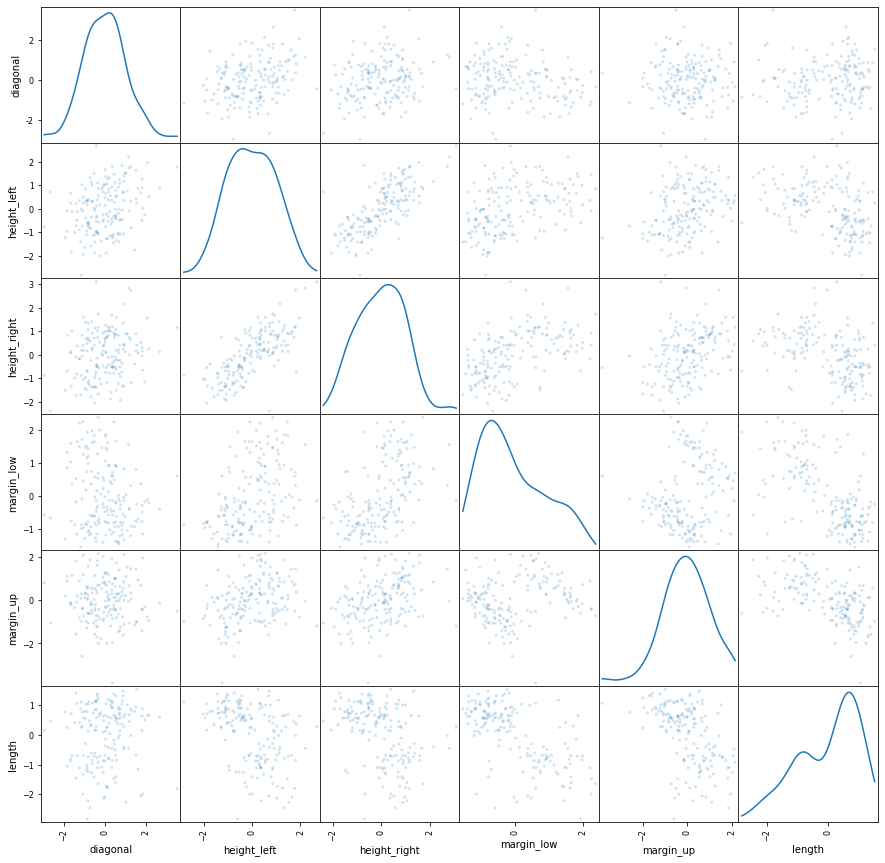

In [61]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data_scaled, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()